**Created by Sanskar Hasija**

**FIXING HIGH VARIANCE ( OVERFITTING ) IN NUERAL NETWORKS**

**14 August 2021**


# <center> FIXING HIGH VARIANCE IN NEURAL NETWORKS</center>

### [1. Effect of increasing  data](#data) ###
### [2. Effect of increasing hidden layers](#layers) ###
### [3. Effect of nodes](#nodes) ###
### [4. Effect of Batch Normalization](#batch) ###
### [5. Effect of Dropouts](#dropout) ###

##    [Conclusions](#conclusion) ##

## IMPORTS

In [1]:
import tensorflow as tf 
import numpy as np
import matplotlib.pyplot as plt


tf.random.set_seed(1)
EPOCHS = 40
LR = 0.0001
OPT = tf.keras.optimizers.SGD(LR , 0.99)
plt.style.use('fivethirtyeight')
plt.rcParams["figure.figsize"] = (18,6)

## LOADING DATA

In [2]:
(x_train , y_train) , (x_test , y_test ) = tf.keras.datasets.mnist.load_data()
x_train = x_train /255 
x_test = x_test/255

11493376/11490434 [==============================] - 0s 0us/step


### MODEL DESIGN 

We will first start with a simple linear model with 1 input node and 10 ouptut nodes with softmax activation.

In [3]:
model = tf.keras.Sequential([tf.keras.layers.Flatten(input_shape = x_train.shape[1:]),
                            tf.keras.layers.Dense(10,activation = "softmax")])
model.compile(optimizer=OPT,
              loss = "sparse_categorical_crossentropy",
              metrics = ["accuracy"])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 10)                7850      
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


<a id="data"></a>
# EFFECT OF INCREASING DATA

In [4]:
(x_train_partial , y_train_partial) = (x_train[:30000] ,  y_train[:30000])

### Training on 50% of the total training data

In [5]:
partial_data = model.fit(x_train_partial , y_train_partial, 
                    validation_data=(x_test , y_test),
                    epochs= EPOCHS ,
                    verbose = 0 )

### Training on total training data

In the next cell, the same model is created once more as a way to reset the weights from the previous trained data.

In [6]:
model = tf.keras.Sequential([tf.keras.layers.Flatten(input_shape = x_train.shape[1:]),
                            tf.keras.layers.Dense(10,activation = "softmax")])
model.compile(optimizer=OPT,
              loss = "sparse_categorical_crossentropy",
              metrics = ["accuracy"])
full_data = model.fit(x_train , y_train, 
                    validation_data=(x_test , y_test),
                    epochs=EPOCHS ,
                    verbose = 0 )

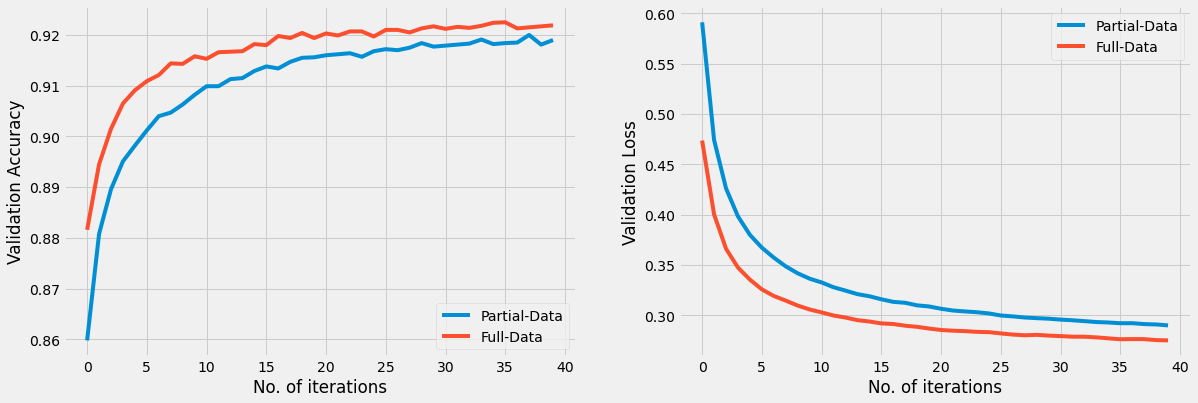

In [7]:
fig , ax = plt.subplots(nrows = 1 , ncols =  2)
ax[0].plot(partial_data.history['val_accuracy'], label='Partial-Data'  )
ax[0].plot(full_data.history['val_accuracy'], label='Full-Data' , )
ax[0].set_xlabel("No. of iterations")
ax[0].set_ylabel("Validation Accuracy")
ax[0].legend(loc = 'lower right')
ax[1].plot(partial_data.history['val_loss'], label='Partial-Data' , )
ax[1].plot(full_data.history['val_loss'], label='Full-Data' , )
ax[1].set_xlabel("No. of iterations")
ax[1].set_ylabel("Validation Loss")
ax[1].legend(loc = 'upper right');

<a id="layers"></a>
# EFFECT OF INCREASING HIDDEN LAYERS

### Adding one extra hidden layer

In [8]:
model = tf.keras.Sequential([tf.keras.layers.Flatten(input_shape = x_train.shape[1:]),
                             tf.keras.layers.Dense(10 , activation = "relu"),
                            tf.keras.layers.Dense(10,activation = "softmax")])
model.compile(optimizer=OPT,
              loss = "sparse_categorical_crossentropy",
              metrics = ["accuracy"])
one_added_layers = model.fit(x_train , y_train, 
                    validation_data=(x_test , y_test),
                    epochs=EPOCHS ,
                    verbose = 0 )

### Adding two extra hidden layers

In [9]:
model = tf.keras.Sequential([tf.keras.layers.Flatten(input_shape = x_train.shape[1:]),
                             tf.keras.layers.Dense(10 , activation = "relu"),
                             tf.keras.layers.Dense(20 , activation = "relu"),
                            tf.keras.layers.Dense(10,activation = "softmax")])
model.compile(optimizer=OPT,
              loss = "sparse_categorical_crossentropy",
              metrics = ["accuracy"])
two_added_layers = model.fit(x_train , y_train, 
                    validation_data=(x_test , y_test),
                    epochs=EPOCHS ,
                    verbose = 0 )

### Adding three extra hidden layers

In [10]:
model = tf.keras.Sequential([tf.keras.layers.Flatten(input_shape = x_train.shape[1:]),
                             tf.keras.layers.Dense(20 , activation = "relu"),
                             tf.keras.layers.Dense(40 , activation = "relu"),
                             tf.keras.layers.Dense(20 , activation = "relu"),
                            tf.keras.layers.Dense(10,activation = "softmax")])
model.compile(optimizer=OPT,
              loss = "sparse_categorical_crossentropy",
              metrics = ["accuracy"])
three_added_layers =  model.fit(x_train , y_train, 
                    validation_data=(x_test , y_test),
                    epochs=EPOCHS ,
                    verbose = 0 )

### Adding five extra hidden layers

In [11]:
model = tf.keras.Sequential([tf.keras.layers.Flatten(input_shape = x_train.shape[1:]),
                             tf.keras.layers.Dense(10 , activation = "relu"),
                             tf.keras.layers.Dense(20 , activation = "relu"),
                             tf.keras.layers.Dense(40 , activation = "relu"),
                             tf.keras.layers.Dense(20 , activation = "relu"),
                            tf.keras.layers.Dense(10,activation = "softmax")])
model.compile(optimizer=OPT,
              loss = "sparse_categorical_crossentropy",
              metrics = ["accuracy"])
five_added_layers = model.fit(x_train , y_train, 
                    validation_data=(x_test , y_test),
                    epochs=EPOCHS ,
                    verbose = 0 )

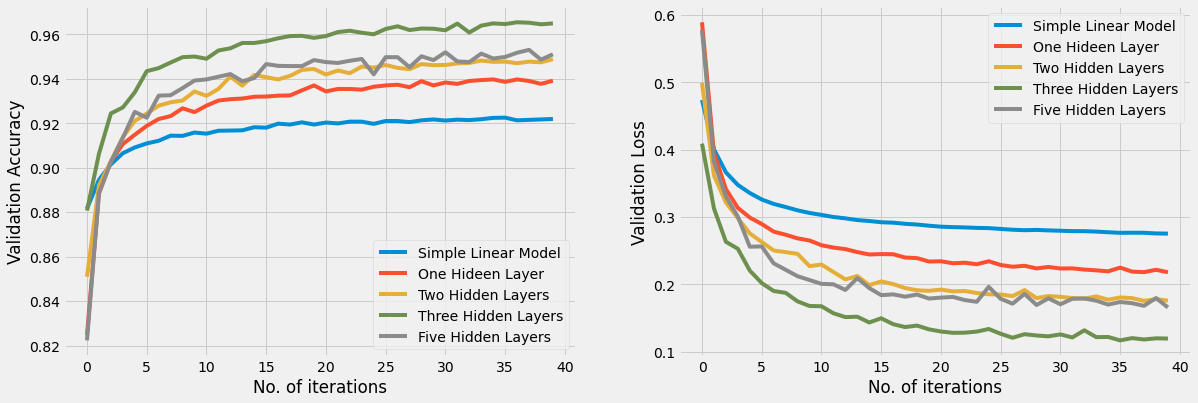

In [12]:
fig , ax = plt.subplots(nrows = 1 , ncols =  2)
ax[0].plot(full_data.history['val_accuracy'], label='Simple Linear Model')
ax[0].plot(one_added_layers.history['val_accuracy'], label='One Hideen Layer')
ax[0].plot(two_added_layers.history['val_accuracy'], label='Two Hidden Layers')
ax[0].plot(three_added_layers.history['val_accuracy'], label='Three Hidden Layers')
ax[0].plot(five_added_layers.history['val_accuracy'], label='Five Hidden Layers')
ax[0].set_xlabel("No. of iterations")
ax[0].set_ylabel("Validation Accuracy")
ax[0].legend(loc = 'lower right')
ax[1].plot(full_data.history['val_loss'], label='Simple Linear Model')
ax[1].plot(one_added_layers.history['val_loss'], label='One Hideen Layer')
ax[1].plot(two_added_layers.history['val_loss'], label='Two Hidden Layers')
ax[1].plot(three_added_layers.history['val_loss'], label='Three Hidden Layers')
ax[1].plot(five_added_layers.history['val_loss'], label='Five Hidden Layers')
ax[1].set_xlabel("No. of iterations")
ax[1].set_ylabel("Validation Loss")
ax[1].legend(loc = 'upper right');

<a id="nodes"></a>
# EFFECT OF UNITS(NODES) IN LAYERS

Adding small units to a 3 hidden-layers model

In [13]:
model = tf.keras.Sequential([tf.keras.layers.Flatten(input_shape = x_train.shape[1:]),
                             tf.keras.layers.Dense(80,activation = "relu"),
                             tf.keras.layers.Dense(40,activation = "relu"),
                             tf.keras.layers.Dense(20,activation = "relu"),
                            tf.keras.layers.Dense(10,activation = "softmax")])
model.compile(optimizer=OPT,
              loss = "sparse_categorical_crossentropy",
              metrics = ["accuracy"])
small_units = model.fit(x_train , y_train, 
                    validation_data=(x_test , y_test),
                    epochs=EPOCHS ,
                    verbose = 0 )

Adding large units to a 3 hidden-layers model

In [14]:
model = tf.keras.Sequential([tf.keras.layers.Flatten(input_shape = x_train.shape[1:]),
                             tf.keras.layers.Dense(512,activation = "relu"),
                             tf.keras.layers.Dense(128,activation = "relu"),
                             tf.keras.layers.Dense(64,activation = "relu"),
                            tf.keras.layers.Dense(10,activation = "softmax")])
model.compile(optimizer=OPT,
              loss = "sparse_categorical_crossentropy",
              metrics = ["accuracy"])
large_units = model.fit(x_train , y_train, 
                    validation_data=(x_test , y_test),
                    epochs=EPOCHS ,
                    verbose = 0 )

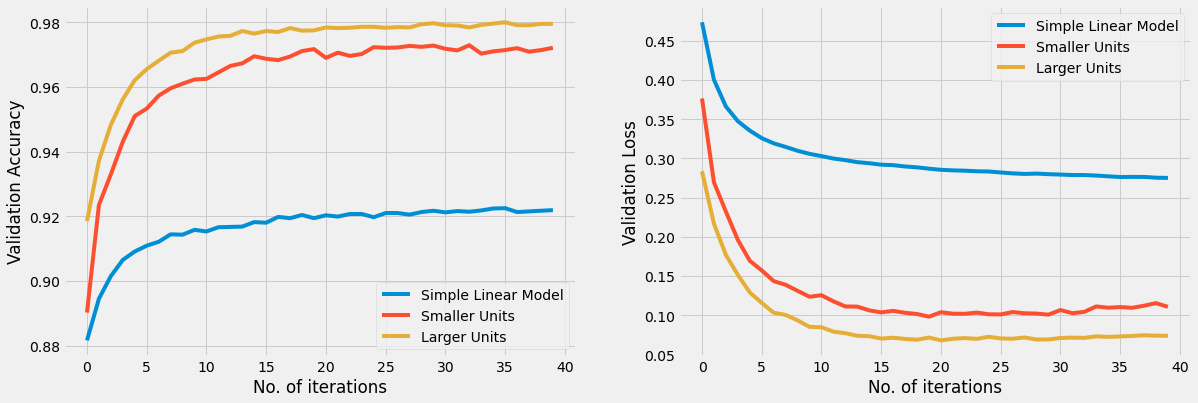

In [15]:
fig , ax = plt.subplots(nrows = 1 , ncols =  2)
ax[0].plot(full_data.history['val_accuracy'], label='Simple Linear Model')
ax[0].plot(small_units.history['val_accuracy'], label='Smaller Units')
ax[0].plot(large_units.history['val_accuracy'], label='Larger Units')
ax[0].set_xlabel("No. of iterations")
ax[0].set_ylabel("Validation Accuracy")
ax[0].legend(loc = 'lower right')
ax[1].plot(full_data.history['val_loss'], label='Simple Linear Model')
ax[1].plot(small_units.history['val_loss'], label='Smaller Units')
ax[1].plot(large_units.history['val_loss'], label='Larger Units')
ax[1].set_xlabel("No. of iterations")
ax[1].set_ylabel("Validation Loss")
ax[1].legend(loc = 'upper right');

# EFFECT OF BATCH NORMALIZATION 
<a id="batch"></a>

We will add Batch Norm Layers to our last best model to check its effect on training accuracy.

In [16]:
model = tf.keras.Sequential([tf.keras.layers.Flatten(input_shape = x_train.shape[1:]),
                             tf.keras.layers.Dense(512,activation = "relu"),
                             tf.keras.layers.BatchNormalization(),
                             tf.keras.layers.Dense(128,activation = "relu"),
                             tf.keras.layers.BatchNormalization(),
                             tf.keras.layers.Dense(64,activation = "relu"),
                            tf.keras.layers.Dense(10,activation = "softmax")])
model.compile(optimizer=OPT,
              loss = "sparse_categorical_crossentropy",
              metrics = ["accuracy"])
bn = model.fit(x_train , y_train, 
                    validation_data=(x_test , y_test),
                    epochs=EPOCHS ,
                    verbose = 0 )

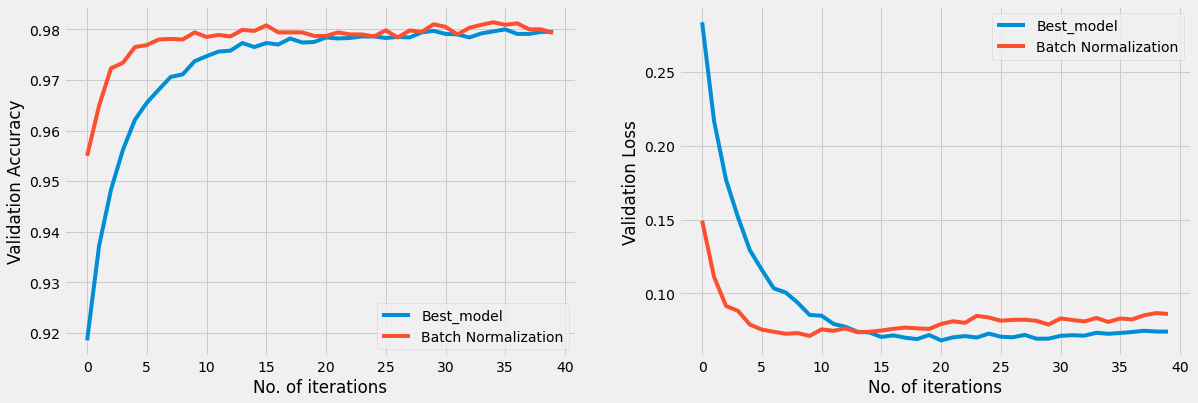

In [17]:
fig , ax = plt.subplots(nrows = 1 , ncols =  2)
ax[0].plot(large_units.history['val_accuracy'], label='Best_model')
ax[0].plot(bn.history['val_accuracy'], label='Batch Normalization')
ax[0].set_xlabel("No. of iterations")
ax[0].set_ylabel("Validation Accuracy")
ax[0].legend(loc = 'lower right')
ax[1].plot(large_units.history['val_loss'], label='Best_model')
ax[1].plot(bn.history['val_loss'], label='Batch Normalization')
ax[1].set_xlabel("No. of iterations")
ax[1].set_ylabel("Validation Loss")
ax[1].legend(loc = 'upper right');

# EFFECT OF DROPOUTS:
<a id="dropout"></a>

In [18]:
model = tf.keras.Sequential([tf.keras.layers.Flatten(input_shape = x_train.shape[1:]),
                             tf.keras.layers.Dense(512,activation = "relu"),
                             tf.keras.layers.Dropout(0.3),
                             tf.keras.layers.Dense(128,activation = "relu"),
                             tf.keras.layers.Dropout(0.2),
                             tf.keras.layers.Dense(64,activation = "relu"),
                            tf.keras.layers.Dense(10,activation = "softmax")])
model.compile(optimizer=OPT,
              loss = "sparse_categorical_crossentropy",
              metrics = ["accuracy"])
dropout = model.fit(x_train , y_train, 
                    validation_data=(x_test , y_test),
                    epochs=EPOCHS ,
                    verbose = 0 )

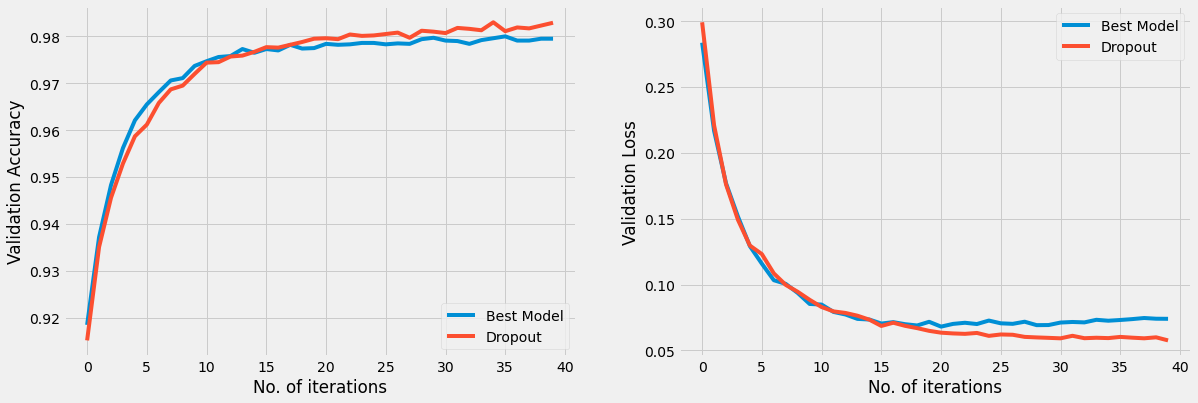

In [19]:
fig , ax = plt.subplots(nrows = 1 , ncols =  2)
ax[0].plot(large_units.history['val_accuracy'], label='Best Model')
ax[0].plot(dropout.history['val_accuracy'], label='Dropout')
ax[0].set_xlabel("No. of iterations")
ax[0].set_ylabel("Validation Accuracy")
ax[0].legend(loc = 'lower right')
ax[1].plot(large_units.history['val_loss'], label='Best Model')
ax[1].plot(dropout.history['val_loss'], label='Dropout')
ax[1].set_xlabel("No. of iterations")
ax[1].set_ylabel("Validation Loss")
ax[1].legend(loc = 'upper right');

# CONCLUSION
<a id="conclusion"></a>

After training the same data on multiple models with different hyperparameters, we can conclude that the following changes/updates can help us in fixing high variance:

* Increasing the amount of training data.
* Increasing the number of hidden layers.
* Increasing the number of hidden units.
* Adding Batch Normalization.
* Adding Dropouts.
* Training for a higher number of epochs.
* Trying more neural networks.

For a more detailed analysis of every factor, check out my blog on Fixing Overfitting [here](https://medium.com/mlearning-ai/hyperparameter-tuning-fixing-overfitting-in-neural-networks-b983b21d60bd).